## Importeren van de data

Als eerste moeten we de data importen. We openen daarvoor de csv file en zetten de data in verschillende variabelen:

* columns is een dictionary die de naam van de kolom vertaalt naar de index voor de data array
* rows is een list van elke rij die als een list is opgeslagen
* data is een dictionary van de index van de kolom naar een lijst van data voor die kolom

In [90]:
import csv
import numpy as np
import math
import matplotlib.pyplot as plt

filename = 'utrecht.csv'

## Functies

In [91]:
def modus(list):
    number_count = {}
    
    for number in list:
        if number in number_count:
            number_count[number] = number_count[number] + 1
        else:
            number_count[number] = 0
    
    return max(number_count, key=number_count.get)

In [92]:
def average(list):
    total_value = 0
    
    for number in list:
        total_value = total_value + number
    
    return (total_value / len(list))

In [93]:
def median(list):
    list.sort()

    # Check if there exists a center
    if len(list) % 2:
        # Take the center number
        median = list[len(list) / 2]
    else:
        # If there is no middle take the average of the 2 center numbers
        center = math.ceil(len(list) / 2)
        median = (list[center] + list[center + 1]) / 2
    
    return median

In [94]:
def standard_deviation(list):
    total = 0
    individual_square_total = 0
    total_square_divided = 0
    
    for number in list:
        total = total + number
        individual_square_total = individual_square_total + (number * number)
    
    square_divided = (total * total) / len(list) 
    variance = (individual_square_total - square_divided) / (len(list) - 1)
    
    return math.sqrt(variance)

In [95]:
def confidence_interval(list, confidence_percentage):
    confidence_z = {
        80: 1.282,
        85: 1.440,
        90: 1.645,
        95: 1.960,
        99: 2.576,
        99.5: 2.807,
        99.9: 3.291
    }
    
    sample_size = len(list)
    list_average = average(list)
    list_standard_deviation = standard_deviation(list)
    
    confidence = confidence_z[confidence_percentage] * (list_standard_deviation / math.sqrt(sample_size))
    
    minimum = list_average - confidence
    maximum = list_average + confidence
    
    return minimum, maximum

In [96]:
def linear_regression(x_axis, y_axis):
    x = average(x_axis)
    y = average(y_axis)
    
    count = len(x_axis)
    num = sum(i * j for i, j in zip(x_axis, y_axis)) - count * x * y
    denum = sum(i**2 for i in x_axis) - count * x ** 2
    b = num / denum
    a = y - b * x
    
    return a, b

## Parsen van de data

In [97]:
columns = {}
rows = []
data = {}

# hulp functie om te kijken of de waarde een integer is
def is_number(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

with open(filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    line_count = 0
    for row in csv_reader:
        # anders reageren als het de eerste regel is, dat zijn namelijk de kolomnamen
        if line_count == 0:
            line_count += 1
            i = 0
            for c in row:
                columns[c] = i
                data[i] = []
                i += 1
        else:
            line_count += 1
            # alleen importeren als het maanddata is, niet de cummulatieven over een jaar
            if 'JJ00' in row[columns['Perioden']]:
                pass
            else:
                rows.append(row)
                i = 0
                for c in row:
                    if is_number(c):
                        data[i].append(int(c))
                    else:
                        data[i].append(c)
                    i = i+1

Hier printen we de namen van de kolommen zodat je kan zien welke data er in het bestand zit

## Output

In [99]:
for column in columns:
    column_data = data[columns[column]]
    
    if is_number(column_data[0]):
        print('\033[1m' + column + '\033[0m')
        print("Gemiddlde: " + str(average(column_data)))
        print("Mediaan: " + str(median(column_data)))
        print("Modus: " + str(modus(column_data)))
        print("Standard deviation: " + str(standard_deviation(column_data)))
        print ('\r\n')

﻿ID
Gemiddlde: 114955.58737864078
Mediaan: 114956.5
Modus: 114845
Standard deviation: 64.56986865238169


BevolkingAanHetBeginVanDePeriode_1
Gemiddlde: 307466.31067961163
Mediaan: 308471.0
Modus: 260625
Standard deviation: 27837.286430176588


LevendGeborenKinderen_2
Gemiddlde: 396.0339805825243
Mediaan: 399.5
Modus: 392
Standard deviation: 38.647926908458814


Overledenen_3
Gemiddlde: 158.55339805825244
Mediaan: 157.5
Modus: 156
Standard deviation: 18.61535068377176


TotaleVestiging_4
Gemiddlde: 2008.8640776699028
Mediaan: 1904.0
Modus: 1523
Standard deviation: 591.2911964472112


VestigingVanuitEenAndereGemeente_5
Gemiddlde: 1628.009708737864
Mediaan: 1593.0
Modus: 1171
Standard deviation: 350.0352315409329


Immigratie_6
Gemiddlde: 380.8543689320388
Mediaan: 288.0
Modus: 168
Standard deviation: 297.3454723173847


TotaalVertrekInclAdmCorrecties_7
Gemiddlde: 1803.0
Mediaan: 1732.0
Modus: 1614
Standard deviation: 388.655481019925


VertrekNaarAndereGemeente_8
Gemiddlde: 1465.64563106

## Verwerken van de data

Hier printen we de data voor alle maanden van het laatste jaar van het vertrek uit de gemeente.

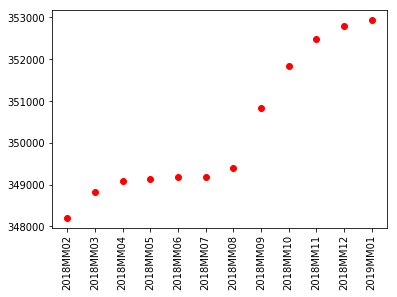

In [100]:
x = data[columns['Perioden']][-13:-1]
y = data[columns['BevolkingAanHetEindeVanDePeriode_15']][-13:-1]

plt.plot( x, y, 'ro')
plt.xticks(rotation=90)
plt.show()

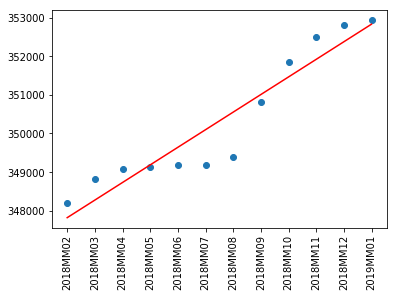

In [101]:
x_range = list(range(len(x))) 
a, b = linear_regression(x_range, y)
y_axis = [a + b * i for i in x_range]

plt.scatter(x, y) 
plt.plot(x, y_axis, 'r-')
plt.xticks(rotation=90)
plt.show()

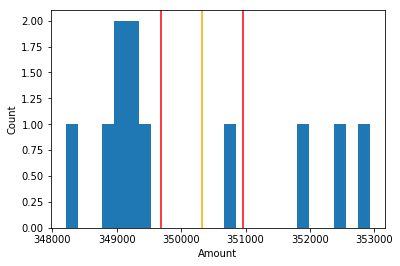

In [105]:
n_bins = (max(y) - min(y)) / 25

plt.hist(y, bins=np.arange(min(y), max(y) + n_bins, n_bins))
y_average = average(y)
plt.axvline(x=y_average, color='orange')

for value in confidence_interval(y, 80):
    plt.axvline(x=value, color='red', linestyle='-')

plt.ylabel('Count')
plt.xlabel('Amount')
plt.show()